In [2]:
# word pair encoding
import os
from gensim.parsing.preprocessing import preprocess_string
from gensim import corpora

def read1k():
    return f.read(1024)

def read_in_chunks(infile, chunk_size=1024*64):
    chunk = infile.read(chunk_size)
    while chunk:
        yield chunk
        chunk = infile.read(chunk_size)

def process_data(chunk, text):
    text.append(str(chunk)) # 'utf8' codec can't decode byte 0xc3

def rmsword(corpus, stopwords):
    '''remove stopwords from corpus'''
    return [word for word in corpus if word not in stopwords]

def chunks(l, n):
    '''Yield successive n-sized chunks from list l'''
    for i in range(0, len(l), n):
        yield l[i:i + n] # returns a generator

def chunksep(l, s):
    '''Yield successive chunks from list l separated by s'''
    g = []
    for el in l:
        if el == s:
            yield g
            g = []
        g.append(el)
    yield g
    
def ctprs(txt, ex_sp=False) -> dict:
    '''count symbol pair frequencies'''
    pairs = defaultdict(int)
    for i in range(len(txt) - 1):
        if ex_sp:
            if txt[i] == ' ' or txt[i+1] == ' ':
                continue
        pairs[txt[i], txt[i+1]] += 1
    return pairs

def ctwp(corpus, wds=1):
    '''count close word frequencies for corpus (tokenized) at distance wds'''
    res = {}
    for i in range(wds, len(corpus)-wds):
        if corpus[i-wds] == corpus[i] or corpus[i+wds] == corpus[i]:
            try:
                res[corpus[i]] += 1
            except KeyError:
                res[corpus[i]] = 1
    return res

def frqprsd(corpus, wds=1):
    '''find the most frequent word pairs at the given distance'''
    res = {}
    for it0 in range(len(corpus)): # first token
        for it1 in [max(it0-wds,0),min(it0+wds,len(corpus)-1)]:
            if it0 != it1:
                try:
                    res[str(corpus[it0]) + '_' + str(corpus[it1])] += 1
                except KeyError:
                    res[str(corpus[it0]) + '_' + str(corpus[it1])] = 1
    return res  

def frqprsw(corpus, wds=1):
    '''find the most frequent word pairs inside the given distance'''
    res = {}
    for it0 in range(len(corpus)): # first token
        for it1 in range(max(it0-wds,0),min(it0+wds,len(corpus)-1)):
            if it0 != it1:
                try:
                    res[str(corpus[it0]) + '_' + str(corpus[it1])] += 1
                except KeyError:
                    res[str(corpus[it0]) + '_' + str(corpus[it1])] = 1
    return res   

def main():
    os.chdir(r'D:\BernieData\DeepL\lrgtxt0')
    f = open('Proktols of Neptune.txt', encoding="utf-8")
    text = []
    for piece in read_in_chunks(f):
        process_data(piece, text)
    corpus = preprocess_string(' '.join(text))
    dct = corpora.Dictionary([corpus])  # initialize a Dictionary
    # tokenize text
    corptzd = [dct.token2id[x] for x in corpus] # tokenized corpus
    #print(ctwp(corptzd, 1))
    #print(dct.keys())
    #fw = frqprsd(corptzd, 1)
    #print(fw)
    
    for niter in range(100):
        # find most frequent pairs
        fwd = frqprsw(corptzd, 5+niter)
        fl = []
        for fel in fwd.items():
            if fel[1] > 5+niter:
                fl.append(fel)
        fl.sort(reverse=True, key=lambda el: el[1])
        #print(fl)
        #print(len(dct.items()))

        splitfel = []
        felrem = []
        felremw = []
        # replace words with a concat token e.g. w0_w1
        for fel in fl:
            thisrml = fel[0].split('_')
            splitfel.append(thisrml)
            felrem += thisrml[0] + thisrml[1]
            i0 = corptzd.index(int(thisrml[0]))
            i1 = corptzd.index(int(thisrml[1]))
            if (i1 - i0) <= (5+niter):
                corptzd.pop(i1) # remove original pairs from corpus
                corptzd.pop(i0)
                dct.add_documents([[fel[0]]])
                corptzd.insert(i0, dct.token2id[fel[0]]) # add new paired token
                felremw.append((dct[int(thisrml[0])], dct[int(thisrml[1])]))
        #print(splitfel)

        #corptzd = [x for x in corptzd if x not in felrem]
        #print(corptzd[:20])
        #print(list(dct.items())[:20])
        #print(dct[605])
        #corpus = [dct[x] for x in corptzd] # reconstruct corpus
        #print(corpus[:50])
        #dct.filter_tokens(bad_ids=felrem)
        #dct.compactify()
        #corptzd = [dct.token2id[x] for x in corpus] # tokenize corpus again
        #print(corptzd)
        #print(felremw)
    corpus = [dct[x] for x in corptzd] # reconstruct corpus
    print(corpus[:100])
    
    for wrd in corpus:
        if wrd.find('_') > 0:
            thisrml = wrd.split('_')
            print(dct[int(thisrml[0])], dct[int(thisrml[1])])
    
    
if __name__=='__main__':
    main()

['henri', 'hass', 'rumor', 'spun', 'wild', 'tale', 'horror', 'neptun', 'legendari', 'race', 'rumor', 'hideou', 'realiti', 'captain', 'captiv', 'crew', 'transcrib', 'note', 'etext', 'produc', 'planet', 'stori', 'summer', 'extens', 'research', 'uncov', 'evid', 'copyright', 'public', 'renew', '223_680', 'bafflement', 'board', 'patrol', '1096_1159', 'deflector', 'needl', 'gyrat', 'wildli', 'begun', 'minut', 'ago', 'lip', 'tighten', 'irrit', 'mate', 'peer', 'inquisit', 'shoulder', 'better', 'check', 'cours', 'sir', 'point', 'perfect', 'slightest', 'aberr', '680_223', 'breath', 'figur', 'object', 'dead', 'ahead', 'caus', 'disturb', 'deflector', 'beam', 'shunt', 'pivot', 'pace', 'control', 'room', 'fix', 'steadili', 'visipanel', 'mere', 'shook', '592_692', 'panel', 'magnifi', 'cours', 'sharpest', 'patrol', 'damn', 'bit', '680_737', 'stare', 'crazi', 'needl', 'jump', 'bear', '317_109', 'cut', 'jet', 'better', 'drift', 'better', 'abl', 'determin', 'wrong']
command janu
ship space
janu command
h

In [1]:
# binomial sampling example
import random
import math
import numpy as np

def binom(n,k,p):
    '''binomial distribution'''
    return math.factorial(n) / math.factorial(n-k) / math.factorial(k) * p**k * (1-p)**(n-k)

def binomcf(n,k,p):
    '''binomial distribution cumulative'''
    return sum([binom(n,i,p) for i in range(k)])

def binsmpl(n,k,p):
    '''return a sample from a binomial distribution'''
    ui = random.random() # continuous [0,1]
    klow = 0
    while klow < 1000: # just to be safe
        if binomcf(n,klow,p)<ui and ui<binomcf(n,klow+1,p): # todo: tables for performance
            return klow
        klow += 1
    
def main():
    #print(binom(6,4,0.3))
    avrg = 0.
    for i in range(1000):
        #print(binsmpl(6,4,0.3))
        avrg += binsmpl(6,4,0.3)
    print(avrg/1000)
    print(np.average(np.random.binomial(6, 0.3, 1000)))
    
if __name__=='__main__':
    main()    

1.806
1.798


In [1]:
# truncatable primes
# A truncatable prime is a prime number that when you successively
# remove digits from one end of the prime, you are left with a new prime number.
def primes(n):
    multiples = set()
    prime = []
    for i in range(2, n+1):
        if i not in multiples:
            prime.append(i)
            multiples.update(set(range(i*i, n+1, i)))
    return prime

def truncp(n):
    '''find l+r truncatable primes up to n'''
    pl = primes(n)
    pl.sort(reverse=True)
    res = []
    mxpl = 0
    mxpr = 0
    for cp in pl:
        if mxpl == 0:
            cpllr = [int(str(cp)[i:]) for i in range(len(str(cp)))]
            istrp = True
            for cpl in cpllr:
                if pl.count(cpl) == 0:
                    istrp = False
                    break
            if istrp:
                mxpl = cp
        if mxpr == 0:
            cpllr = [int(str(cp)[:i]) for i in range(len(str(cp)),0,-1)]
            istrp = True
            for cpr in cpllr:
                if pl.count(cpr) == 0:
                    istrp = False
                    break
            if istrp:
                mxpr = cp
        if mxpl>0 and mxpr>0:
            return (mxpl, mxpr)  
    return (mxpl, mxpr)

# largest left-truncatable and right-truncatable primes less than one million (base 10 is implied).
def main():
    print(truncp(1000000))
    
if __name__=='__main__':
    main()

(999907, 739399)


In [1]:
cp = 1234
#[int(str(cp)[i:]) for i in range(len(str(cp)))]
[int(str(cp)[:i]) for i in range(len(str(cp)),0,-1)]

[1234, 123, 12, 1]

In [23]:
from numba import jit # https://numba.pydata.org/
import random

@jit(nopython=True)
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

def main():
    print(monte_carlo_pi(10000))
    
if __name__=='__main__':
    main()

3.1132


### Numba

careful: does not work well with Pandas -> test preprocessing, clean data, then deploy numba for performance-intensive parts

In [24]:
from numba import jit
import numpy as np
import time

x = np.arange(100).reshape(10, 10)

@jit(nopython=True)
def go_fast(a): # Function is compiled and runs in machine code
    trace = 0.0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace

# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.time()
go_fast(x)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE
start = time.time()
go_fast(x)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

Elapsed (with compilation) = 0.3666656017303467
Elapsed (after compilation) = 0.0


In [2]:
# finance data sites
# https://db.nomics.world/
# https://github.com/addisonlynch/iexfinance
# Useful Collection of Forecasts: http://www.forecasts.org/stpoor.htm
# Massive Collection of Indicators: https://www.assetmacro.com/
# Labor Statistics: https://www.bls.gov/
# Data from the US Treasury: https://home.treasury.gov/

ticker = 'AMD'
timeframe = '1y'
df = p.chartDF(ticker, timeframe)
df = df[['close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
df.dropna(inplace=True) # dropna() will remove all NaN entries from our dataframe

df.fillna(df.mean(), inplace=True) # fillna() will replace NaN entries with the desired argument

sns.pairplot(data=df, hue="asset_price")

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X1,Y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(5,'Score')) #print 5 best features

sel_feature = ['P/E','Debt','Revenue'] # Select features
X1 = df1[sel_feature].values
Y1 = df1['math score'].values
Y1 = Y1.flatten()
X_scale1 = scale(X1)

NameError: name 'p' is not defined

In [9]:
# another attention test
import numpy as np

def softmax(x):
    """softmax applied to set of values x"""
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

enc_hidd_st = np.array([[0,1,1], [5,0,1], [1,1,0], [0,5,1]])
dec_hid_st = np.array([[10, 5, 10]])

scores = np.dot(enc_hidd_st, dec_hid_st.T)
sm_scores = softmax(scores)
ctx_vec = enc_hidd_st * sm_scores

print('context vector: ', np.dot(np.array([[1,1,1,1]]), ctx_vec))

context vector:  [[5.00000000e+00 6.94397194e-11 1.00000000e+00]]


In [6]:
# some webscraper
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

headers = ({'User-Agent':'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML,like Gecko) Chrome/41.0.2228.0 Safari/537.36'})
sapo = "https://casa.sapo.pt/Venda/Apartamentos/?sa=11&or=10"
response = get(sapo, headers=headers)

titles = []
created = []
prices = []
areas = []
zone = []
condition = []
descriptions = []
urls = []
thumbnails = []

n_pages = 0
for page in range(0,900):
    n_pages += 1
    sapo_url = 'https://casa.sapo.pt/Venda/Apartamentos/?sa=11&lp=10000&or=10'+'&pn='+str(page)
    r = get(sapo_url, headers=headers)
    page_html = BeautifulSoup(r.text, 'html.parser')
    house_containers = page_html.find_all('div', class_="searchResultProperty")
    if house_containers != []:
        for container in house_containers:
            # Price
            price = container.find_all('span')[2].text
            if price == 'Contacte Anunciante':
                price = container.find_all('span')[3].text
                if price.find('/') != -1:
                    price = price[0:price.find('/')-1]
            if price.find('/') != -1:
                price = price[0:price.find('/')-1]
            price_ = [int(price[s]) for s in range(0,len(price)) if price[s].isdigit()]
            price = ''
            for x in price_:
                price = price+str(x)
            prices.append(int(price))
            # Zone
            location = container.find_all('p', class_="searchPropertyLocation")[0].text
            location = location[7:location.find(',')]
            zone.append(location)
            # Title
            name = container.find_all('span')[0].text
            titles.append(name)
            # Status
            status = container.find_all('p')[5].text
            condition.append(status)
            # Area
            m2 = container.find_all('p')[9].text
            if m2 != '-':
                m2 = m2.replace('\xa0','')
                m2 = float("".join(itertools.takewhile(str.isdigit, m2)))
                areas.append(m2)
            else:
                m2 = container.find_all('p')[7].text
                if m2 != '-':
                    m2 = m2.replace('\xa0','')
                    m2 = float("".join(itertools.takewhile(str.isdigit, m2)))
                    areas.append(m2)
                else:
                    areas.append(m2)
            # Creation date
            date = pd.to_datetime(container.find_all('div', class_="searchPropertyDate")[0].text[21:31])
            created.append(date)
            # Description
            desc = container.find_all('p', class_="searchPropertyDescription")[0].text[7:-6]
            descriptions.append(desc)
            # url
            link = 'https://casa.sapo.pt/' + container.find_all('a')[0].get('href')[1:-6]
            urls.append(link)

            # image
            img = str(container.find_all('img')[0])
            img = img[img.find('data-original_2x=')+18:img.find('id=')-2]
            thumbnails.append(img)
    else:
        break
                                  
    sleep(randint(1,2))
print('You scraped {} pages containing {} properties.'.format(n_pages, len(titles)))

IndexError: list index out of range

In [1]:
# yet another attention test
import numpy as np

def softmax(x):
    '''softmax applied to set of values x'''
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

def posscr(x, w):
    '''position score via weights'''
    return np.dot(x, w)

def addconc(eh, dh, wed, wc):
    '''additive and concat score'''
    return np.dot(np.dot(wed, np.concatenate((eh, dh), axis=0)), wc.T)

enc_hidd_st = np.array([[0,1,1], [5,0,1], [1,1,0], [0,5,1]])
dec_hid_st = np.array([[10, 5, 10]])

scores_v = np.dot(enc_hidd_st, dec_hid_st.T)
#scores = softmax(scores_v)
scores = posscr(scores_v, np.array([[.1, 0, .1]]))
ctx_vec = enc_hidd_st * scores

print('context vector: ', np.dot(np.array([[1,1,1,1]]), ctx_vec))

print('add/concat: ', addconc(enc_hidd_st, dec_hid_st, np.array([[0,1,0,0,1]]), np.array([[1,1,1]])))

context vector:  [[31.5  0.  11. ]]
add/concat:  [[31]]


In [1]:
# queens
import random

def rddraw(l):
    return random.sample(l, len(l))

def haspr(l):
    lel = l[0]
    for i in range(1,len(l)):
        if l[i] == lel and lel == 1:
            return True
        lel = l[i]
    return False

def main():
    #print(rddraw([0,0,1,1]))
    #print(haspr(rddraw([0,0,1,1])))
    qc = 0
    for i in range(10000):
        if haspr(rddraw([0,0,1,1])):
            qc += 1
    print(qc/100)
    
if __name__=='__main__':
    main()

50.38


In [1]:
# dice game
import random

def thrwdc(nf):
    '''throw a dice with nf faces'''
    return random.randint(1,nf)

def smndc(nf, n):
    '''throw n dice with nf faces and return sum'''
    return sum([thrwdc(nf) for x in range(n)])

def main():
    #print(smndc(6,6))
    ngms = 100000
    p0w = 0
    for i in range(ngms):
        if smndc(4, 9) > smndc(6, 6):
            p0w += 1
    print(p0w/ngms)
    p0w = 0
    for i in range(ngms):
        if smndc(10, 5) > smndc(7, 6):
            p0w += 1
    print(p0w/ngms)
    
if __name__=='__main__':
    main()

0.57427
0.6436


In [4]:
from collections import defaultdict
 
costs  = {'W': {'A': 16, 'B': 16, 'C': 13, 'D': 22, 'E': 17},
          'X': {'A': 14, 'B': 14, 'C': 13, 'D': 19, 'E': 15},
          'Y': {'A': 19, 'B': 19, 'C': 20, 'D': 23, 'E': 50},
          'Z': {'A': 50, 'B': 12, 'C': 50, 'D': 15, 'E': 11}}
demand = {'A': 30, 'B': 20, 'C': 70, 'D': 30, 'E': 60}
cols = sorted(demand.iterkeys())
supply = {'W': 50, 'X': 60, 'Y': 50, 'Z': 50}
res = dict((k, defaultdict(int)) for k in costs)
g = {}
for x in supply:
    g[x] = sorted(costs[x].iterkeys(), key=lambda g: costs[x][g])
for x in demand:
    g[x] = sorted(costs.iterkeys(), key=lambda g: costs[g][x])
 
while g:
    d = {}
    for x in demand:
        d[x] = (costs[g[x][1]][x] - costs[g[x][0]][x]) if len(g[x]) > 1 else costs[g[x][0]][x]
    s = {}
    for x in supply:
        s[x] = (costs[x][g[x][1]] - costs[x][g[x][0]]) if len(g[x]) > 1 else costs[x][g[x][0]]
    f = max(d, key=lambda n: d[n])
    t = max(s, key=lambda n: s[n])
    t, f = (f, g[f][0]) if d[f] > s[t] else (g[t][0], t)
    v = min(supply[f], demand[t])
    res[f][t] += v
    demand[t] -= v
    if demand[t] == 0:
        for k, n in supply.iteritems():
            if n != 0:
                g[k].remove(t)
        del g[t]
        del demand[t]
    supply[f] -= v
    if supply[f] == 0:
        for k, n in demand.iteritems():
            if n != 0:
                g[k].remove(f)
        del g[f]
        del supply[f]
 
for n in cols:
    print ("\t", n,)
print()
cost = 0
for g in sorted(costs):
    print (g, "\t",)
    for n in cols:
        y = res[g][n]
        if y != 0:
            print (y,)
        cost += y * costs[g][n]
        print ("\t",)
    print()
print ("\n\nTotal Cost = ", cost)

AttributeError: 'dict' object has no attribute 'iterkeys'

In [2]:
# test staged embedding schema: words -> tokens -> segment -> position
text = "Hello,How,Are,You,Today"
tokens = text.split(',')
print ('.'.join(tokens))

Hello.How.Are.You.Today


0 0.9999720684626245
100 0.006459538782427279
[9.97382582e-01 3.74493177e-05 5.36757962e-05 4.00798863e-05]
w1


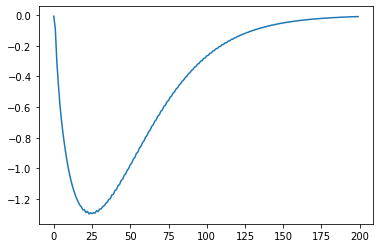

w2


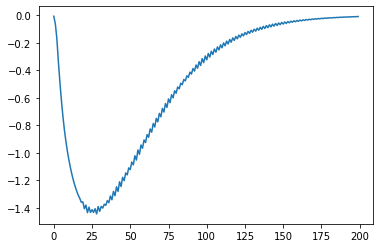

In [100]:
# simple NN iteration test: weight development
import numpy as np
import matplotlib.pyplot as plt
import random

modeldim = 4
nshown = 4
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = nshown+1, modeldim, 4, modeldim

inpt = np.ones(modeldim) # input
y = np.zeros(D_out) # truth
y[0] = 1

# Randomly initialize weights
w1 = np.random.randn(D_in, H)*0.01
w2 = np.random.randn(H, D_out)*0.01

b1 = np.zeros(H) # bias
b2 = np.zeros(D_out)

mw1 = np.zeros_like(w1)
mw2 = np.zeros_like(w2)
mb1 = np.zeros_like(b1)
mb2 = np.zeros_like(b2)

# graph weights
yw1 = []
yw2 = []

learning_rate = 1e-2

for t in range(200):
    # Forward pass: compute predicted y
    h = np.dot(inpt, w1) + b1
    h_relu = np.maximum(h, 0)
    #h_relu = softmax(h)
    #y_pred = np.dot(h_relu, w2) + b2 # output
    y_pred = np.dot(w2.T, h_relu) + b2 # output

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 0:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = (y_pred - y)
    #print(h_relu, ' : ', grad_y_pred.T, ' : ', h_relu)
    grad_w2 = np.dot(h_relu, np.ones_like(w2)) * grad_y_pred # dw2 = (.) ReLu(h)
    grad_b2 = grad_y_pred
    grad_h_relu = np.dot(grad_y_pred, w2.T) # dw1 = (.) w2 ReLu'(h) x
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0 # ReLU'
    grad_w1 = np.dot(inpt.T, np.ones_like(w1)) * grad_h
    grad_b1 = np.dot(w2, grad_y_pred.T)

    # Update weights
    #w1 -= learning_rate * grad_w1
    #w2 -= learning_rate * grad_w2
    #b1 -= learning_rate * grad_b1.T[0]
    #b2 -= learning_rate * grad_b2[0]
    for param, dparam, mem in zip([w1, w2, b1, b2], [grad_w1, grad_w2, grad_b1.T[0], grad_b2[0]], [mw1, mw2, mb1, mb2]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update
        
    yw1.append(np.sum(grad_w1))
    yw2.append(np.sum(grad_w2))
        
print(y_pred)
x = range(len(yw1))
print('w1')
plt.plot(x, yw1)
plt.show()
print('w2')
plt.plot(x, yw2)
plt.show()

In [3]:
# Hilbert curve dithering
from itertools import (chain, islice)
 
# hilbertCurve :: Int -> SVG String
def hilbertCurve(n):
    '''An SVG string representing a
       Hilbert curve of degree n.
    '''
    w = 1024
    return svgFromPoints(w)(
        hilbertPoints(w)(
            hilbertTree(n)
        )
    )
 
# hilbertTree :: Int -> Tree Char
def hilbertTree(n):
    '''Nth application of a rule to a seedling tree.'''
 
    # rule :: Dict Char [Char]
    rule = {
        'a': ['d', 'a', 'a', 'b'],
        'b': ['c', 'b', 'b', 'a'],
        'c': ['b', 'c', 'c', 'd'],
        'd': ['a', 'd', 'd', 'c']
    }
 
    # go :: Tree Char -> Tree Char
    def go(tree):
        c = tree['root']
        xs = tree['nest']
        return Node(c)(
            map(go, xs) if xs else map(
                flip(Node)([]),
                rule[c]
            )
        )
    seed = Node('a')([])
    return list(islice(
        iterate(go)(seed), n
    ))[-1] if 0 < n else seed

# hilbertPoints :: Int -> Tree Char -> [(Int, Int)]
def hilbertPoints(w):
    '''Serialization of a tree to a list of points
       bounded by a square of side w.
    '''
 
    # vectors :: Dict Char [(Int, Int)]
    vectors = {
        'a': [(-1, 1), (-1, -1), (1, -1), (1, 1)],
        'b': [(1, -1), (-1, -1), (-1, 1), (1, 1)],
        'c': [(1, -1), (1, 1), (-1, 1), (-1, -1)],
        'd': [(-1, 1), (1, 1), (1, -1), (-1, -1)]
    }
 
    # points :: Int -> ((Int, Int), Tree Char) -> [(Int, Int)]
    def points(d):
        '''Size -> Centre of a Hilbert subtree -> All subtree points
        '''
        def go(xy, tree):
            r = d // 2
 
            def deltas(v):
                return (
                    xy[0] + (r * v[0]),
                    xy[1] + (r * v[1])
                )
            centres = map(deltas, vectors[tree['root']])
            return chain.from_iterable(
                map(points(r), centres, tree['nest'])
            ) if tree['nest'] else centres
        return go
 
    d = w // 2
    return lambda tree: list(points(d)((d, d), tree))

# svgFromPoints :: Int -> [(Int, Int)] -> SVG String (save output text as file with.svg and view in browser)
def svgFromPoints(w):
    '''Width of square canvas -> Point list -> SVG string'''
 
    def go(xys):
        def points(xy):
            return str(xy[0]) + ' ' + str(xy[1])
        xs = ' '.join(map(points, xys))
        return '\n'.join(
            ['<svg xmlns="http://www.w3.org/2000/svg"',
             f'width="512" height="512" viewBox="5 5 {w} {w}">',
             f'<path d="M{xs}" ',
             'stroke-width="2" stroke="red" fill="transparent"/>',
             '</svg>'
             ]
        )
    return go

# ------------------------- TEST --------------------------
def main():
    '''Testing generation of the SVG for a Hilbert curve'''
    print(
        hilbertCurve(6)
    )

# ------------------- GENERIC FUNCTIONS -------------------
# Node :: a -> [Tree a] -> Tree a
def Node(v):
    '''Contructor for a Tree node which connects a
       value of some kind to a list of zero or
       more child trees.'''
    return lambda xs: {'type': 'Node', 'root': v, 'nest': xs}

# flip :: (a -> b -> c) -> b -> a -> c
def flip(f):
    '''The (curried or uncurried) function f with its
       arguments reversed.
    '''
    return lambda a: lambda b: f(b)(a)

# iterate :: (a -> a) -> a -> Gen [a]
def iterate(f):
    '''An infinite list of repeated
       applications of f to x.
    '''
    def go(x):
        v = x
        while True:
            yield v
            v = f(v)
    return go

#  TEST ---------------------------------------------------
if __name__ == '__main__':
    main()

<svg xmlns="http://www.w3.org/2000/svg"
width="512" height="512" viewBox="5 5 1024 1024">
<path d="M8 1016 24 1016 24 1000 8 1000 8 984 8 968 24 968 24 984 40 984 40 968 56 968 56 984 56 1000 40 1000 40 1016 56 1016 72 1016 72 1000 88 1000 88 1016 104 1016 120 1016 120 1000 104 1000 104 984 120 984 120 968 104 968 88 968 88 984 72 984 72 968 72 952 72 936 88 936 88 952 104 952 120 952 120 936 104 936 104 920 120 920 120 904 104 904 88 904 88 920 72 920 72 904 56 904 40 904 40 920 56 920 56 936 56 952 40 952 40 936 24 936 24 952 8 952 8 936 8 920 24 920 24 904 8 904 8 888 8 872 24 872 24 888 40 888 56 888 56 872 40 872 40 856 56 856 56 840 40 840 24 840 24 856 8 856 8 840 8 824 24 824 24 808 8 808 8 792 8 776 24 776 24 792 40 792 40 776 56 776 56 792 56 808 40 808 40 824 56 824 72 824 88 824 88 808 72 808 72 792 72 776 88 776 88 792 104 792 104 776 120 776 120 792 120 808 104 808 104 824 120 824 120 840 120 856 104 856 104 840 88 840 72 840 72 856 88 856 88 872 72 872 72 888 88 888 104 

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]
 [6 3]]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.41421356]]


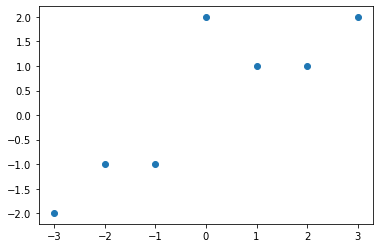

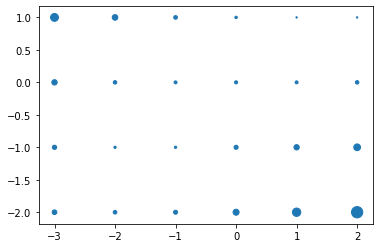

In [1]:
# test sparcity map
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

def spsty(k, x, nbrs):
    '''sparsity at x for k neighbors'''
    dist, ind = nbrs.kneighbors(x)
    return np.sum(dist) / k

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2], [0, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X) # 2 neighbors: indices has the indices of the closest pairs
distances, indices = nbrs.kneighbors(X) # distances corresponding to indices

print(indices)
print(distances)

xc = [x[0] for x in X]
yc = [y[1] for y in X]
plt.scatter(xc, yc)
plt.show()

nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(X)
#print(spsty(4, np.array([[0, 0]]), nbrs))
spmp = []
for sxc in range(-3,3):
    for syc in range(-2,2):
        spmp.append([sxc, syc, spsty(4, np.array([[sxc, syc]]), nbrs)])
#print(spmp)
xc = [x[0] for x in spmp]
yc = [y[1] for y in spmp]
vals = [sv[2]**4 for sv in spmp]
plt.scatter(xc, yc, s=vals)
plt.show()

In [41]:
# set consolidation
def setcons(stlst):
    '''consolidate list of sets'''
    res = set()
    for st in stlst:
        res = res.union(st)
    return res

def main():
    print(setcons([{'H','I','K'}, {'A','B'}, {'C','D'}, {'D','B'}, {'F','G','H'}]))

if __name__ == '__main__':
    main()

{'I', 'B', 'F', 'H', 'K', 'G', 'A', 'D', 'C'}


0 1.0001110900150008
100 0.007920708083499293
200 7.912086096670188e-06
300 6.679855047289231e-09
400 5.6078320591309515e-12
500 4.707082561305965e-15
600 3.950995606809055e-18
700 3.3163462414140587e-21
800 2.78370370296559e-24
900 2.34312103708051e-27
[1.00000000e+00 0.00000000e+00 0.00000000e+00 2.77555756e-17]
w1


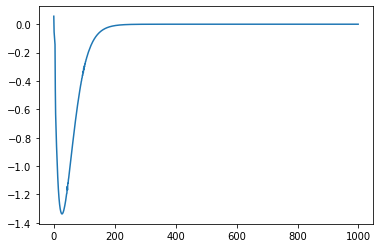

w2


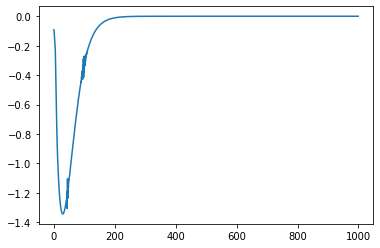

In [99]:
# simple NN iteration test: output to input feedback
import numpy as np
import matplotlib.pyplot as plt
import random

def softmax(x):
    """softmax applied to set of values x"""
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

modeldim = 4
nshown = 4
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = nshown+1, modeldim, 4, modeldim

inpt = np.ones(modeldim) # input
y = np.zeros(D_out) # truth
y[0] = 1

# Randomly initialize weights
w1 = np.random.randn(D_in, H)*0.01
w2 = np.random.randn(H, D_out)*0.01

b1 = np.zeros(H) # bias
b2 = np.zeros(D_out)

mw1 = np.zeros_like(w1)
mw2 = np.zeros_like(w2)
mb1 = np.zeros_like(b1)
mb2 = np.zeros_like(b2)

# graph weights
yw1 = []
yw2 = []

learning_rate = 1e-2

for t in range(1000):
    # Forward pass: compute predicted y
    h = np.dot(inpt, w1) + b1
    h_relu = np.maximum(h, 0)
    #h_relu = softmax(h)
    #y_pred = np.dot(h_relu, w2) + b2 # output
    y_pred = np.dot(w2.T, h_relu) + b2 # output

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 0:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = (y_pred - y)
    #print(h_relu, ' : ', grad_y_pred.T, ' : ', h_relu)
    grad_w2 = np.dot(h_relu, np.ones_like(w2)) * grad_y_pred # dw2 = (.) ReLu(h)
    grad_b2 = grad_y_pred
    grad_h_relu = np.dot(grad_y_pred, w2.T) # dw1 = (.) w2 ReLu'(h) x
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0 # ReLU'
    grad_w1 = np.dot(inpt.T, np.ones_like(w1)) * grad_h
    grad_b1 = np.dot(w2, grad_y_pred.T)

    # Update weights
    #w1 -= learning_rate * grad_w1
    #w2 -= learning_rate * grad_w2
    #b1 -= learning_rate * grad_b1.T[0]
    #b2 -= learning_rate * grad_b2[0]
    for param, dparam, mem in zip([w1, w2, b1, b2], [grad_w1, grad_w2, grad_b1.T[0], grad_b2[0]], [mw1, mw2, mb1, mb2]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update
        
    yw1.append(np.sum(grad_w1))
    yw2.append(np.sum(grad_w2))
        
print(y_pred)

x = range(len(yw1))
print('w1')
plt.plot(x, yw1)
plt.show()
print('w2')
plt.plot(x, yw2)
plt.show()

In [1]:
from itertools import groupby
 
def collapser(txt):
    return ''.join(item for item, grp in groupby(txt))
 
if __name__ == '__main__':
    strings = [
            "",
            '"If I were two-faced, would I be wearing this one?" --- Abraham Lincoln ',
            "..1111111111111111111111111111111111111111111111111111111111111117777888",
            "I never give 'em hell, I just tell the truth, and they think it's hell. ",
            "                                                   ---  Harry S Truman  ",
            "The better the 4-wheel drive, the further you'll be from help when ya get stuck!",
            "headmistressship",
            "aardvark",
            "😍😀🙌💃😍😍😍🙌",
            ]
    for txt in strings:
        this = "Original"
        print(f"\n{this:14} Size: {len(txt)} «««{txt}»»»" )
        this = "Collapsed"
        sqz = collapser(txt)
        print(f"{this:>14} Size: {len(sqz)} «««{sqz}»»»" )


Original       Size: 0 «««»»»
     Collapsed Size: 0 «««»»»

Original       Size: 72 «««"If I were two-faced, would I be wearing this one?" --- Abraham Lincoln »»»
     Collapsed Size: 70 «««"If I were two-faced, would I be wearing this one?" - Abraham Lincoln »»»

Original       Size: 72 «««..1111111111111111111111111111111111111111111111111111111111111117777888»»»
     Collapsed Size: 4 «««.178»»»

Original       Size: 72 «««I never give 'em hell, I just tell the truth, and they think it's hell. »»»
     Collapsed Size: 69 «««I never give 'em hel, I just tel the truth, and they think it's hel. »»»

Original       Size: 72 «««                                                   ---  Harry S Truman  »»»
     Collapsed Size: 17 ««« - Hary S Truman »»»

Original       Size: 80 «««The better the 4-wheel drive, the further you'll be from help when ya get stuck!»»»
     Collapsed Size: 77 «««The beter the 4-whel drive, the further you'l be from help when ya get stuck!»»»

Original       Size

In [2]:
w = "print('w = ' + chr(34) + w + chr(34) + chr(10) + w)"
print('w = ' + chr(34) + w + chr(34) + chr(10) + w) 

w = "print('w = ' + chr(34) + w + chr(34) + chr(10) + w)"
print('w = ' + chr(34) + w + chr(34) + chr(10) + w)


In [48]:
# base conversion
import math

def conv(a, na, nb):
    '''convert a in base na to a number in base nb'''
    bva = [na**x for x in range(len(a)-1,-1,-1)]
    pvla = [int(x) for x in a]
    b10v = sum([bva[i]*pvla[i] for i in range(len(a))])
    bvb = [nb**x for x in range(math.floor(math.log(b10v)/math.log(nb)),-1,-1)]
    pvlb = []
    for bex in bvb:
        cex = b10v // bex
        pvlb.append(cex)
        b10v -= bex*cex
    return ''.join([str(x) for x in pvlb])

def main():
    print(conv('360721', 8, 10))
    print(oct(123345))
    print(conv('360721', 8, 2))
    print(bin(123345))
    
if __name__ == '__main__':
    main()

123345
0o360721
11110000111010001
0b11110000111010001


In [54]:
# quadratic iterator
def qit(x0, c):
    '''simple quadratic iterator'''
    while True:
        x0 = x0*x0 + c
        yield x0
    
def main():
    for x in qit(1.1,1):
        print(x)
        if x > 100:
            break
    
if __name__ == '__main__':
    main()

2.21
5.8841
35.62263281
1269.9719683160884


0 0.9999118951749724
[ 1.23460373e+00 -4.76995113e-04 -4.28082591e-04 -5.58544070e-04]
w1


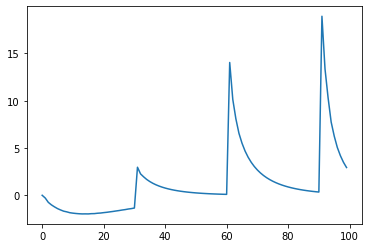

w2


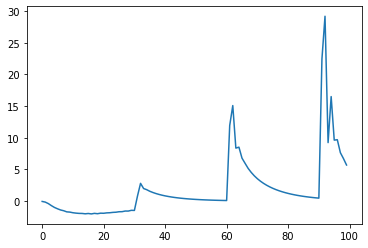

In [101]:
# simple NN iteration test: split weights
import numpy as np
import matplotlib.pyplot as plt
import random

def softmax(x):
    """softmax applied to set of values x"""
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

modeldim = 4
nshown = 4
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = nshown+1, modeldim, 4, modeldim

inpt = np.ones(D_in) # input
y = np.zeros(D_out) # truth
y[0] = 1

# Randomly initialize weights
w1 = np.random.randn(D_in, H)*0.01
w2 = np.random.randn(H, D_out)*0.01

b1 = np.zeros(H) # bias
b2 = np.zeros(D_out)

mw1 = np.zeros_like(w1)
mw2 = np.zeros_like(w2)
mb1 = np.zeros_like(b1)
mb2 = np.zeros_like(b2)

# graph weights
yw1 = []
yw2 = []

learning_rate = 1e-2

for t in range(100):
    # Forward pass: compute predicted y
    h = np.dot(inpt, w1) + b1
    h_relu = np.maximum(h, 0)
    #h_relu = softmax(h)
    #y_pred = np.dot(h_relu, w2) + b2 # output
    y_pred = np.dot(w2.T, h_relu) + b2 # output

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 0:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = (y_pred - y)
    #print(h_relu, ' : ', grad_y_pred.T, ' : ', h_relu)
    grad_w2 = np.dot(h_relu, np.ones_like(w2)) * grad_y_pred # dw2 = (.) ReLu(h)
    grad_b2 = grad_y_pred
    grad_h_relu = np.dot(grad_y_pred, w2.T) # dw1 = (.) w2 ReLu'(h) x
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0 # ReLU'
    grad_w1 = np.dot(inpt.T, np.ones_like(w1)) * grad_h
    grad_b1 = np.dot(w2, grad_y_pred.T)

    # Update weights
    #w1 -= learning_rate * grad_w1
    #w2 -= learning_rate * grad_w2
    #b1 -= learning_rate * grad_b1.T[0]
    #b2 -= learning_rate * grad_b2[0]
    for param, dparam, mem in zip([w1, w2, b1, b2], [grad_w1, grad_w2, grad_b1.T[0], grad_b2[0]], [mw1, mw2, mb1, mb2]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update
        
    yw1.append(np.sum(grad_w1))
    yw2.append(np.sum(grad_w2))
    
    if t % 30 == 0:
        # double layer weights
        w1 = np.repeat(w1, 2, axis=1)
        b1 = np.repeat(b1, 2, axis=0)
        w2 = np.repeat(w2, 2, axis=0)
        mw1 = np.repeat(mw1, 2, axis=1)
        mb1 = np.repeat(mb1, 2, axis=0)
        mw2 = np.repeat(mw2, 2, axis=0)   
        
print(y_pred)

x = range(len(yw1))
print('w1')
plt.plot(x, yw1)
plt.show()
print('w2')
plt.plot(x, yw2)
plt.show()

In [76]:
x = np.array([[1,2],[3,4]])
print(np.repeat(x, [1, 2], axis=1)) # repeat(a, repeats, axis=None)
print(np.repeat(x, 2, axis=1)) # repeat(a, repeats, axis=None)
print(np.repeat(x, [2, 2], axis=0)) # repeat(a, repeats, axis=None)
print(np.repeat(x, 2, axis=0)) # repeat(a, repeats, axis=None)

[[1 2 2]
 [3 4 4]]
[[1 1 2 2]
 [3 3 4 4]]
[[1 2]
 [1 2]
 [3 4]
 [3 4]]
[[1 2]
 [1 2]
 [3 4]
 [3 4]]
